# Machine Learning Lab 02

For this lab, you can find sections for NumPy, Pandas, Matplotlib, Exploratory Data Analysis, and the optional Analysis of Anscombe's Quartet.

Please add new cells for your code to expand this notebook (**File** --> **Insert**)

## NumPy

In [15]:
import numpy as np

an_array = np.array([])

another_array = np.array([0,1,2,3,4,3,2,1,0,3])

an_array = np.append(an_array, another_array)

c = np.array([(1, 3, 3, 7), (4, 2, 4, 2)])

print(an_array)
print(c)

[0. 1. 2. 3. 4. 3. 2. 1. 0. 3.]
[[1 3 3 7]
 [4 2 4 2]]


In [16]:
print("3rd value (at index 2):", another_array[2])
print("Value at (0, 2) =", c[0,2])
print("1st row =", c[0])
print("2nd column =", c[:,1])
print("2nd column (up to 1st row) =", c[:1,1])

for row in c:
    print(row)

3rd value (at index 2): 2
Value at (0, 2) = 3
1st row = [1 3 3 7]
2nd column = [3 2]
2nd column (up to 1st row) = [3]
[1 3 3 7]
[4 2 4 2]


## SciPy

In [18]:
from scipy import stats

print("\nDescriptive statistics:")
print("\tshape =", c.shape)
print("\tsize =", c.size)
print("\tmin =", c.min())
print("\tmax =", c.max())
print("\tmean =", c.mean()) # can also use np.mean(another_array)
print("\tmedian =", np.median(c)) # can also use another_array.median()
print("\tmode =", stats.mode(c)[0]," (",stats.mode(c),")")
print("\tvariance =", np.var(c))
print("\tstandard_deviation =", np.std(c))


Descriptive statistics:
	shape = (2, 4)
	size = 8
	min = 1
	max = 7
	mean = 3.25
	median = 3.0
	mode = [1 2 3 2]  ( ModeResult(mode=array([1, 2, 3, 2]), count=array([1, 1, 1, 1])) )
	variance = 2.9375
	standard_deviation = 1.713913650100261


## Pandas

In [21]:
import pandas as pd

# Hardcoded dictionary
data = {
    'apples': [3, 2, 0, 1],
    'oranges': [0, 3, 7, 2]
}

# Load into a DataFrame
purchases_dataframe = pd.DataFrame(data)
purchases_dataframe

,apples,oranges
0,3,0
1,2,3
2,0,7
3,1,2


from matplotlib import pyplot as plt
purchases_dataframe['apples'].plot(kind='hist', bins=20, title='apples')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
purchases_dataframe['oranges'].plot(kind='hist', bins=20, title='oranges')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
purchases_dataframe.plot(kind='scatter', x='apples', y='oranges', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
purchases_dataframe['apples'].plot(kind='line', figsize=(8, 4), title='apples')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
purchases_dataframe['oranges'].plot(kind='line', figsize=(8, 4), title='oranges')
plt.gca().spines[['top', 'right']].set_visible(False)

## Matplotlib

## Exploratory Data Analysis

Some of the cells below already got code doing things for you.

Some cells are empty for you to do _stuff_ in to **answer questions**!

See lab task notes for the list of questions if you want to see them all in one place.

### Loading the dataset

First, we load the dataset, then we can execute various functions to explore the data, calculate statistics and plot graphs.

In [27]:
import pandas as pd

dataset = pd.read_csv('data/ml-assessment-dataset.csv')
dataset.head()

FileNotFoundError: [Errno 2] No such file or directory: 'data/ml-assessment-dataset.csv'

### Exploring the dataset

The overall aim for the data exploration here is to get a feel for some of the influences on the machine learning marks for past students.

Let's focus on two features for this:
 * Class (1 = pass, 0 = fail)
 * Total mark (the total unit mark, range 0-100)
 * L4 mean mark (to mean mark across all 6 level 4 units)

#### General information

Questions to answer:
* How many instances are there in the dataset?
* What is the mean mark (total), including non-submissions?

In [ ]:
# TODO: answer the two questions with the following functions
# .info()
# .describe()



#### Class (pass/fail) analysis

Questions to answer:
* Is the class balance equal?
* Which class is the MOST represented in the dataset?
* How many students passed?

In [ ]:
# TODO: NUMERIC OUTPUT FOR CLASS BALANCE (NUMBER OF VALUES/INSTANCES FOR EACH CLASS)


In [ ]:
# TODO: CHART FOR CLASS DISTRIBUTION


#### Mark analysis

Questions to answer:

* What is the mean mark (total), including non-submissions?
* What is the mean mark (total), excluding non-submissions?
* What is the mean level 4 mark for the students who passed?
* What is the mean level 4 mark for the students who failed?

In [ ]:
# To get the mean of a specific feature/column, you can use this format:
#   dataset['COLUMN_NAME'].mean()



In [ ]:
# Have a go at using one of these functions for the first 2 questions
#
#    dataset['COLUMN_NAME_FOR_THE_VALUES_YOU_WANT'][dataset['COLUMN_NAME_TO_FILTER_BY'] == FILTER_VALUE_YOU_WANT].mean()
#    dataset.groupby('COLUMN_NAME_TO_GROUP_BY')['COLUMN_NAME_FOR_THE_VALUES_YOU_WANT'].mean()
#
# For example, the following would print out the mean age of ANYBODY (female and male) without heart diseas
#
#    print(dataset['Total mark'][dataset['Class'] == 0].mean())
#    print(dataset.groupby('Class')['Total mark'].mean())
#
# In the examples above, you want to find out the mean ages for genders, not the class (for the first 2 questions)
# Remember, column names are case sensitive

# TODO: Mean mark for those submitted (excluding non-submissions)



# TODO: Mean level 4 mark for those students who passed vs failed



## Analysis of Anscombe's Quartet

There are many ways you can play around with the data and have a look at it, e.g.,

1. a hardcoded approach using numpy and matplotlib
2. an approach using pandas and reading directly from Excel

The example code below uses option 1 just to keep it simpler here.

In [24]:
import numpy as np
from scipy import stats
from numpy.polynomial.polynomial import polyfit
import matplotlib.pyplot as plt

# Anscombe's 1st dataset
x1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y1 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Anscombe's 2nd dataset
x2 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
y2 = np.array([9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74])

# TODO: Anscombe's 3rd dataset


# TODO: Anscombe's 4th dataset



### Print out the stats

* mean
* median
* mode
* variance
* standard deviation

In [ ]:
print("Anscombe stats\n")
# TODO (using Numpy and SciPy)



### Plot regression lines

This is more challenging, but you can use the following code as the basis for:

* Calculate/create regression lines for the 3rd and 4th datasets (that you added above)
* Change the subplot configuration to a 2 x 2 grid (currently 1 x 2)
* Plot the 3rd and 4th datasets (as subplots with the 1st and 2nd datasets)

**REFLECT** on the stats above and what you see in the images.

Text(0, 0.5, 'y')

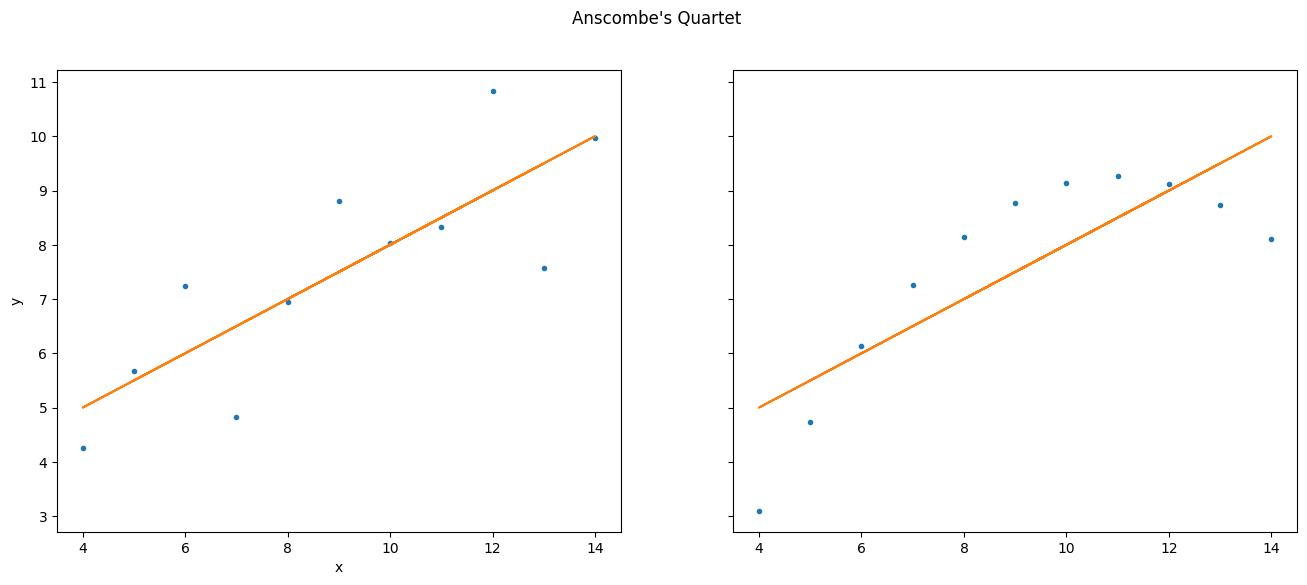

In [25]:
# Linear regression lines
b1, m1 = polyfit(x1, y1, 1)
b2, m2 = polyfit(x2, y2, 1)

# Setting up figure with two sub-plots
fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
fig.suptitle("Anscombe's Quartet")

# Adding figure for Ans-1
axs[0].plot(x1, y1, '.')
axs[0].plot(x1, b1 + m1 * x1, '-')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')

# Adding figure for Ans-2
axs[1].plot(x2, y2, '.')
axs[1].plot(x2, b2 + m2 * x2, '-')
axs[0].set_xlabel('x')
axs[0].set_ylabel('y')